# predicting salary by years of experience(simple linear)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("C:\\Users\\Science Pillar\\Downloads\\Salary_Data.csv")
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [4]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [12]:
inputs=data["YearsExperience"]
target=data["Salary"]
#inputs=data.iloc[:,:-1].values
#target=data[:,-1].values

In [13]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test=train_test_split(inputs , target , test_size=0.2 , random_state=42)

In [14]:
from sklearn.linear_model import LinearRegression

In [18]:
# for inputs with only one features we have to reshape x_trains
x_train_matrix=x_train.values.reshape(-1,1)
x_test_matrix=x_test.values.reshape(-1,1)
x_train_matrix.shape

(24, 1)

In [19]:
reg=LinearRegression()
reg.fit(x_train_matrix , y_train)
reg_pred=reg.predict(x_test_matrix)

In [20]:
#Return the coefficient of determination of the prediction.
reg.score(x_test_matrix , y_test)

0.9024461774180497

In [23]:
reg.score(x_train_matrix , y_train)

0.9645401573418146

In [21]:
#slope
reg.coef_

array([9423.81532303])

In [22]:
reg.intercept_

25321.583011776813

# ERRORS

In [24]:
from sklearn.metrics import mean_absolute_error ,mean_squared_error
MAE=mean_absolute_error(y_test ,reg_pred)
MSE=mean_squared_error(y_test ,reg_pred)

In [25]:
MAE

6286.453830757749

In [26]:
MSE

49830096.85590839

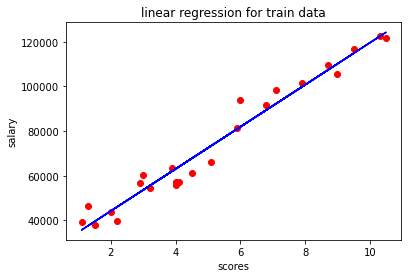

In [31]:
#builting plot by train data
plt.scatter(x_train ,y_train , color="red")
plt.plot(x_train ,reg.predict(x_train_matrix),color="blue")
plt.xlabel("scores")
plt.ylabel("salary")
plt.title("linear regression for train data")
plt.show()

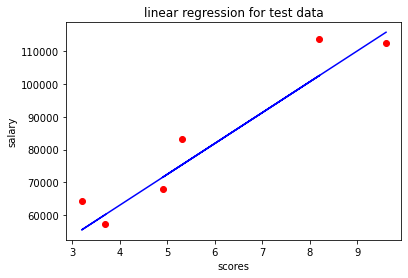

In [32]:
#builting plot by test data
plt.scatter(x_test ,y_test , color="red")
plt.plot(x_test ,reg.predict(x_test_matrix),color="blue")
plt.xlabel("scores")
plt.ylabel("salary")
plt.title("linear regression for test data")
plt.show()

<AxesSubplot:xlabel='Salary', ylabel='Density'>

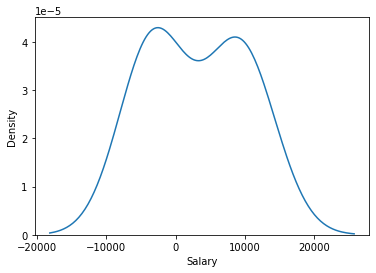

In [34]:
sns.kdeplot(y_test-reg_pred)

# Ridge

In [37]:
from sklearn.linear_model import Ridge

ridge=Ridge(alpha=10)
ridge.fit(x_train_matrix , y_train)

ridge_pred=ridge.predict(x_test_matrix)

In [38]:
MAE=mean_absolute_error(y_test ,ridge_pred)
MSE=mean_squared_error(y_test ,ridge_pred)

In [39]:
MAE

6173.85066405387

In [40]:
MSE

52269192.55867142